In [1]:
# import packages
import numpy as np
import pandas as pd
import nltk
from bertopic import BERTopic
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import umap as UMAP
from hdbscan import HDBSCAN
from collections import Counter
import math
import matplotlib.pyplot as plt
from wordcloud import WordCloud

c:\Users\UPPL - 01\Downloads\Anaconda-coding\envs\bert\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# import dataset
df = pd.read_csv("../datasets/news_dataset_headlines_cleaned.csv")
df.head()

,outlet,headline,nlp_label,nlp-image_label,headline_words,headline_sentence
0,CBC.ca,"Tij Iginla embraces family name, eager to foll...",Likely to be Bias,Likely to be Unbiased,"['tij', 'iginla', 'embrace', 'family', 'name',...",tij iginla embrace family name eager follow ha...
1,CBC.ca,"The Sunday Magazine for June 23, 2024 - CBC.ca",Likely to be Bias,Likely to be Unbiased,"['sunday', 'magazine', 'june']",sunday magazine june
2,CBC News,"Conservative MP shares inaccurate, ChatGPT-gen...",Likely to be Bias,Likely to be Bias,"['conservative', 'mp', 'share', 'inaccurate', ...",conservative mp share inaccurate stats capital...
3,CBC.ca,"Women's sports are more popular than ever, but...",Likely to be Unbiased,Likely to be Unbiased,"['woman', 'sport', 'popular', 'ever', 'study',...",woman sport popular ever study female physiolo...
4,CBC.ca,June 22: Listener Question Show - CBC.ca,Likely to be Bias,Likely to be Unbiased,"['june', 'listener', 'question', 'show']",june listener question show


In [3]:
# ADDITIONAL PRE-PROCESSING

# Define Stopwords List (Expanded)
custom_stopwords = set([
    "could", "should", "would", "may", "might", "said", "year", "just", "many", "even", 
    "still", "back",  "day", "week", "month", "use", "give", "take", "since", "much", 
    "got", "whether", "look", "always", "let", "yet", "asked", "across", "news", "cbs",
    "cnn", "fox", "nbc", "abc", "msnbc", "npr", "bbc", "cnbc", "c-span", "reuters", "today",
    "say", "post", "usa", "financial", "times", "new", "york", "time", "washington", "wall",
    "street", "journal", "guardian", "daily", "news", "globe", "mail", "national", "review",

    "cbc.ca", "cbc_news", "cbc_sports", "breitbart", "daily_caller",
    "the_federalist", "washington_examiner", "daily_kos", "the_daily_beast",
    "national_review", "axios", "propublica", "the_new_yorker", "the_atlantic",
    "newsweek", "time", "financial_times", "the_economist", "economist_impact",
    "cnbc", "huffpost", "newsmax", "the_guardian", "the_guardian_us",
    "pbs_newshour", "al_jazeera_english", "bloomberg", "reuters_uk", "reuters",
    "reuters.com", "forbes", "new_york_post", "politico", "the_associated_press",
    "the_wall_street_journal", "usa_today", "reviewed", "bbc.com",
    "the_washington_post", "washington_post", "img.washingtonpost.com",
    "the_new_york_times", "abc_news", "cbs_minnesota", "cbs_news",
    "cbs_san_francisco", "cbs_miami", "cbs_pittsburgh", "cbs_boston",
    "cbs_chicago", "cbs_los_angeles", "cbs_new_york", "cbs_baltimore",
    "cbs_colardo", "fox_news", "cnn", "cnn_underscored", "cnn_press_room",
    "national_post", "the_globe_and_mail", "global_news_toronto",
    "global_news_lethbridge", "global_news_london", "global_news",
    "global_news_kingston", "global_news_edmonton", "global_news_hamilton",
    "global_news_bc", "global_news_calgary", "global_news_peterborough",
    "global_news_guelph", "global_news_regina", "global_news_halifax",
    "global_news_okanagan", "global_news_montréal", "global_news_ottawa",
    "global_news_saskatoon", "global_news_winnipeg", "global_news_barrie",
    "toronto_sun", "guardian", "c-span", "reuters_india", "reuters_canada", "usa_today",
    "golfweek", "www-staging.washingtonpost.com", "cbs_philly", "fox_news_radio",
    "cnn_international", "pew_research_center", "realclearpolitics", "new_york_time", 
    "associated_press", "globe_mail", "washington_post", "wall_street_journal", 

    'CBC.ca', 'CBC News', 'CBC Sports', 'Breitbart', 'Daily Caller',
    'The Federalist', 'Washington Examiner', 'Daily Kos', 'The Daily Beast',
    'National Review', 'Axios', 'ProPublica', 'The New Yorker', 'The Atlantic',
    'Newsweek', 'TIME', 'Financial Times', 'The Economist', 'Economist Impact',
    'CNBC', 'HuffPost', 'Newsmax', 'The Guardian', 'The Guardian US',
    'PBS NewsHour', 'Al Jazeera English', 'Bloomberg', 'Reuters UK', 'Reuters',
    'Reuters.com', 'Forbes', 'New York Post', 'POLITICO', 'The Associated Press',
    'The Wall Street Journal', 'USA TODAY', 'Reviewed', 'BBC.com',
    'The Washington Post', 'Washington Post', 'img.washingtonpost.com',
    'The New York Times', 'ABC News', 'CBS Minnesota', 'CBS News',
    'CBS San Francisco', 'CBS Miami', 'CBS Pittsburgh', 'CBS Boston',
    'CBS Chicago', 'CBS Los Angeles', 'CBS New York', 'CBS Baltimore',
    'CBS Colardo', 'Fox News', 'CNN', 'CNN Underscored', 'CNN Press Room',
    'National Post', 'The Globe and Mail', 'Global News Toronto',
    'Global News Lethbridge', 'Global News London', 'Global News',
    'Global News Kingston', 'Global News Edmonton', 'Global News Hamilton',
    'Global News BC', 'Global News Calgary', 'Global News Peterborough',
    'Global News Guelph', 'Global News Regina', 'Global News Halifax',
    'Global News Okanagan', 'Global News Montréal', 'Global News Ottawa',
    'Global News Saskatoon', 'Global News Winnipeg', 'Global News Barrie',
    'Toronto Sun', 'C-SPAN', 'Reuters India', 'Reuters Canada', 'USA Today',
    'Golfweek', 'www-staging.washingtonpost.com', 'CBS Philly', 'FOX News Radio',
    'CNN International', 'Pew Research Center', 'RealClearPolitics'

])

# Uncomment this line when running the code for the first time after importing csv
df['headline_words'] = df['headline_words'].apply(eval)

df['headline_words'] = df['headline_words'].apply(lambda x: [word for word in x if word not in custom_stopwords])

df["headline_sentence"] = df["headline_words"].apply(lambda x: " ".join(x))

# drop all null values
# df = df["headline_sentence"].dropna()

df.head()

,outlet,headline,nlp_label,nlp-image_label,headline_words,headline_sentence
0,CBC.ca,"Tij Iginla embraces family name, eager to foll...",Likely to be Bias,Likely to be Unbiased,"[tij, iginla, embrace, family, name, eager, fo...",tij iginla embrace family name eager follow ha...
1,CBC.ca,"The Sunday Magazine for June 23, 2024 - CBC.ca",Likely to be Bias,Likely to be Unbiased,"[sunday, magazine, june]",sunday magazine june
2,CBC News,"Conservative MP shares inaccurate, ChatGPT-gen...",Likely to be Bias,Likely to be Bias,"[conservative, mp, share, inaccurate, stats, c...",conservative mp share inaccurate stats capital...
3,CBC.ca,"Women's sports are more popular than ever, but...",Likely to be Unbiased,Likely to be Unbiased,"[woman, sport, popular, ever, study, female, p...",woman sport popular ever study female physiolo...
4,CBC.ca,June 22: Listener Question Show - CBC.ca,Likely to be Bias,Likely to be Unbiased,"[june, listener, question, show]",june listener question show


In [4]:
df.shape

(40945, 6)

Do 2 different models:
1. include keywords like 'trump' and 'biden' to identify the proportion of articles that have direct political influence (?)
2. remove those keywords to identify how issues are represented e.g. "technology", "financial"

### Model 1

In [38]:
# initialize BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, nr_topics="auto", min_topic_size=50)

# fit BERTopic
topics, probs = topic_model.fit_transform(df['headline_sentence'])

# Print the top topics
print(topic_model.get_topic_info())

    Topic  Count                                      Name  \
0      -1  16575               -1_trump_uk_harris_election   
1       0  10910               0_biden_trump_harris_debate   
2       1   1270           1_israel_gaza_netanyahu_israeli   
3       2   1196               2_china_climate_wildfire_ev   
4       3    866                      3_page_nba_nfl_draft   
5       4    819           4_global_toronto_canada_ontario   
6       5    717            5_olympics_paris_olympic_medal   
7       6    704           6_africa_mexico_venezuela_south   
8       7    693             7_man_police_shooting_detroit   
9       8    382                  8_prime_best_amazon_sale   
10      9    359              9_ai_google_openai_antitrust   
11     10    358                10_france_french_macron_le   
12     11    340                 11_mom_wedding_advice_hax   
13     12    265                      12_dog_cat_owner_pet   
14     13    264           13_outage_airline_flight_boeing   
15     1

In [39]:
topic_model.save("bertopic_model_headline1")

2025-03-27 14:25:47,193 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


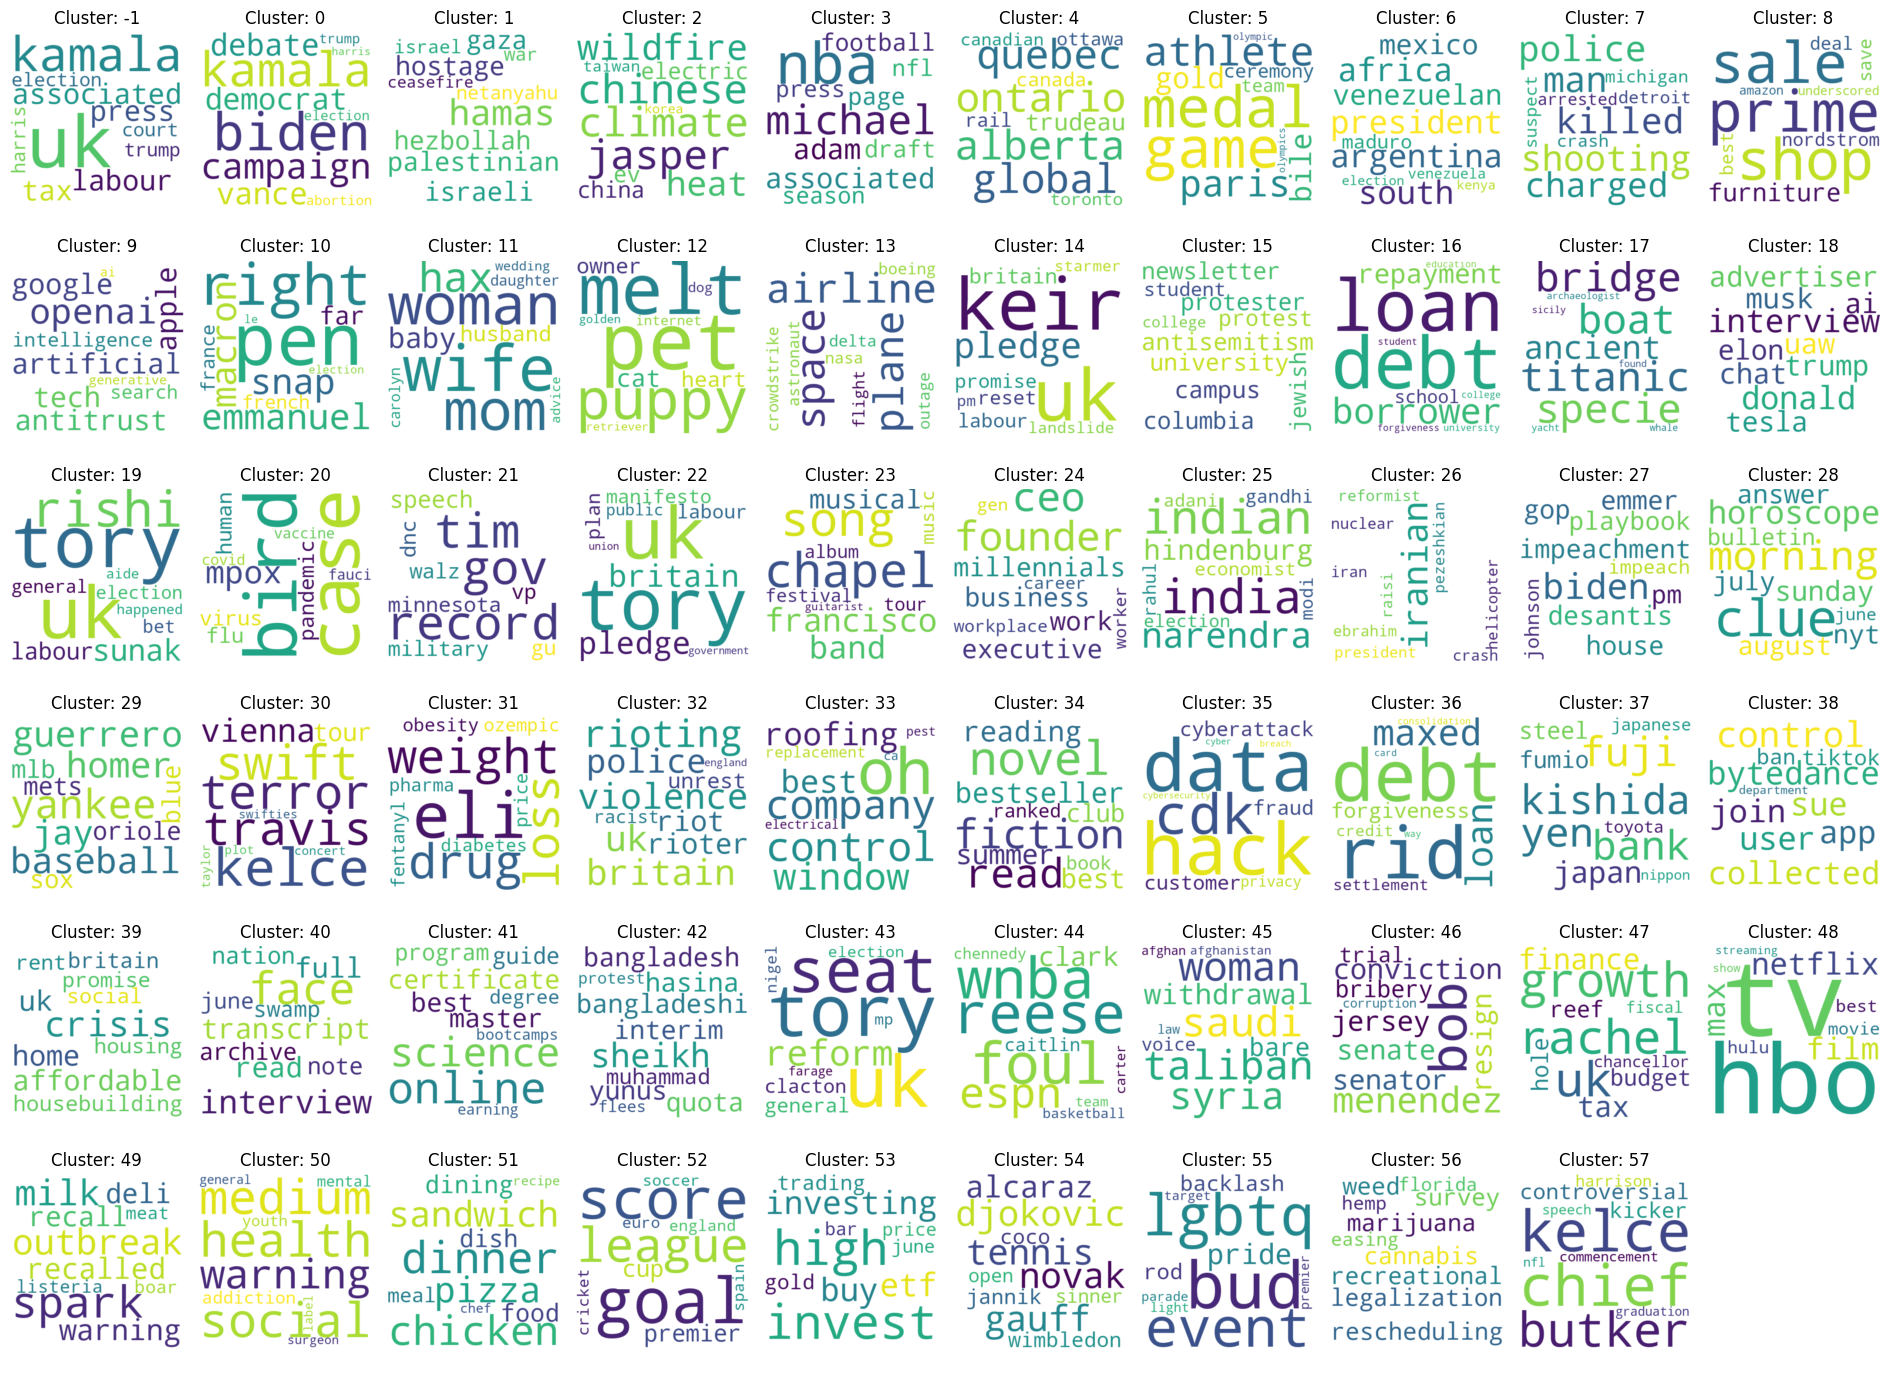

In [40]:
# Get top 20 words in each topic for visualization
# Extract the top 20 words for each topic
top_n = 20
top_words = {}

# Retrieve the topic-word mappings from the BERTopic model
topic_word_mappings = topic_model.get_topics()

for topic_id, topic_words in topic_word_mappings.items():
    # Get the top N words for each topic (sorted by importance)
    top_words[topic_id] = [word for word, _ in topic_words[:top_n]]

num_topics = len(top_words)
num_rows = math.ceil(num_topics / 10)  # 10 columns per row
num_cols = 10

# Create the subplots grid dynamically based on the number of topics
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(19, 14))
axes = axes.flatten()  # Flatten for easier indexing

num_clusters = len(top_words)
if num_clusters == 1:  # If only 1 cluster, make `axes` iterable
    axes = [axes]

for i, (cluster_label, words) in enumerate(top_words.items()):
    # Create word frequency dictionary
    word_freqs = {word: words.count(word) for word in set(words)}
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(word_freqs)
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(f"Cluster: {cluster_label}", fontsize=12)

# Remove unused axes 
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


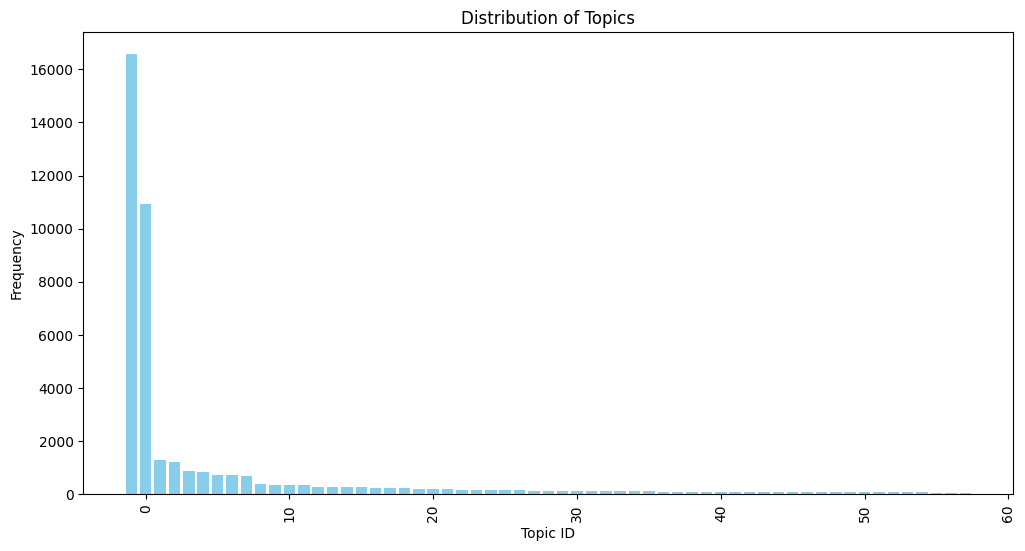

In [41]:
from collections import Counter

# Count the frequency of each topic
topic_counts = Counter(topics)

# Prepare data for the bar chart
topic_labels = list(topic_counts.keys())
topic_frequencies = list(topic_counts.values())

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(topic_labels, topic_frequencies, color='skyblue')
plt.xlabel('Topic ID')
plt.ylabel('Frequency')
plt.title('Distribution of Topics')
plt.xticks(rotation=90)
plt.show()

In [6]:
# load in pre-trained model
topic_model = BERTopic.load("bertopic_model_headline1")

df_topics = df.copy()
topics, probs = topic_model.transform(df_topics["headline_sentence"])
df_topics["topics"] = topics
df_topics["probabilities"] = probs.tolist()
df_topics.head()

# Ensure the number of columns matches the shape of `probs`
prob_df = pd.DataFrame(probs, columns=[f"topic_{i}" for i in range(probs.shape[1])])

# Combine article metadata with topic probabilities
df_corr = pd.concat([df_topics, prob_df], axis=1)
df_corr.head()

,outlet,headline,nlp_label,nlp-image_label,headline_words,headline_sentence,topics,probabilities,topic_0,topic_1,...,topic_48,topic_49,topic_50,topic_51,topic_52,topic_53,topic_54,topic_55,topic_56,topic_57
0,CBC.ca,"Tij Iginla embraces family name, eager to foll...",Likely to be Bias,Likely to be Unbiased,"['tij', 'iginla', 'embrace', 'family', 'name',...",tij iginla embrace family name eager follow ha...,-1,"[0.0024064087060168774, 1.3736009278921556e-05...",2.406409e-03,1.373601e-05,...,0.012379,2.865111e-04,3.296450e-04,3.445862e-04,5.345342e-03,2.193705e-05,2.371869e-03,2.733322e-05,9.984594e-05,6.297551e-05
1,CBC.ca,"The Sunday Magazine for June 23, 2024 - CBC.ca",Likely to be Bias,Likely to be Unbiased,"['sunday', 'magazine', 'june']",sunday magazine june,28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,CBC News,"Conservative MP shares inaccurate, ChatGPT-gen...",Likely to be Bias,Likely to be Bias,"['conservative', 'mp', 'share', 'inaccurate', ...",conservative mp share inaccurate stats capital...,-1,"[0.271576758130293, 3.871285850742647e-05, 0.0...",2.715768e-01,3.871286e-05,...,0.000159,1.596936e-04,1.791932e-04,1.799992e-04,1.533327e-04,7.810469e-05,1.401093e-04,6.238647e-05,1.432484e-04,7.079085e-05
3,CBC.ca,"Women's sports are more popular than ever, but...",Likely to be Unbiased,Likely to be Unbiased,"['woman', 'sport', 'popular', 'ever', 'study',...",woman sport popular ever study female physiolo...,-1,"[5.510603666125009e-18, 2.66712349760083e-21, ...",5.510604e-18,2.667123e-21,...,0.094488,2.132023e-18,2.977451e-18,3.157743e-18,9.508887e-13,5.549869e-21,4.527894e-14,6.159135e-21,1.089675e-19,2.162418e-20
4,CBC.ca,June 22: Listener Question Show - CBC.ca,Likely to be Bias,Likely to be Unbiased,"['june', 'listener', 'question', 'show']",june listener question show,28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [22]:
topic_columns = [col for col in df_corr.columns if col.startswith("topic_")]

# Calculate the mean topic probabilities per outlet
outlet_topic_matrix1 = df_corr.groupby('outlet')[topic_columns].mean().reset_index()

print("\nMean Topic Probabilities per Outlet:\n")
print(outlet_topic_matrix1.head())




Mean Topic Probabilities per Outlet:

               outlet   topic_0   topic_1   topic_2   topic_3   topic_4  \
0            ABC News  0.305353  0.030866  0.056203  0.014210  0.003379   
1  Al Jazeera English  0.100215  0.093137  0.024841  0.004894  0.003066   
2               Axios  0.309479  0.000497  0.045493  0.003646  0.001914   
3             BBC.com  0.212947  0.023558  0.025056  0.011700  0.003907   
4           Bloomberg  0.217707  0.011411  0.079653  0.008098  0.002099   

    topic_5   topic_6   topic_7   topic_8  ...  topic_48  topic_49  topic_50  \
0  0.012865  0.007247  0.005830  0.002955  ...  0.004963  0.007791  0.003702   
1  0.011385  0.014130  0.001797  0.001634  ...  0.001696  0.001647  0.001784   
2  0.001109  0.003761  0.001739  0.001447  ...  0.001409  0.001292  0.025829   
3  0.007928  0.032010  0.002292  0.002717  ...  0.005190  0.001725  0.007747   
4  0.005690  0.037322  0.001439  0.006784  ...  0.006478  0.003208  0.005825   

   topic_51  topic_52  topic_

In [42]:
from sklearn.metrics import silhouette_score

# Get the reduced-dimensional embeddings from the BERTopic model
embeddings = topic_model.transform(df['headline_sentence'])[1]

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(embeddings, topics)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.23939057342677936


### Model 2



In [46]:
df_new = df.copy()
# ADDITIONAL PRE-PROCESSING

# Define Stopwords List (Expanded)
custom_stopwords = set([
    "donald", "trump", "joe", "biden", "harris", "kamala"
])

# Uncomment this line when running the code for the first time after importing csv
# df_new['headline_words'] = df_new['headline_words'].apply(eval)

df_new['headline_words'] = df_new['headline_words'].apply(lambda x: [word for word in x if word not in custom_stopwords])

df_new["headline_sentence"] = df_new["headline_words"].apply(lambda x: " ".join(x))

# drop all null values
# df_new = df_new["headline_sentence"].dropna()

df_new.head()

,outlet,headline,nlp_label,nlp-image_label,headline_words,headline_sentence
0,CBC.ca,"Tij Iginla embraces family name, eager to foll...",Likely to be Bias,Likely to be Unbiased,"[tij, iginla, embrace, family, name, eager, fo...",tij iginla embrace family name eager follow ha...
1,CBC.ca,"The Sunday Magazine for June 23, 2024 - CBC.ca",Likely to be Bias,Likely to be Unbiased,"[sunday, magazine, june]",sunday magazine june
2,CBC News,"Conservative MP shares inaccurate, ChatGPT-gen...",Likely to be Bias,Likely to be Bias,"[conservative, mp, share, inaccurate, stats, c...",conservative mp share inaccurate stats capital...
3,CBC.ca,"Women's sports are more popular than ever, but...",Likely to be Unbiased,Likely to be Unbiased,"[woman, sport, popular, ever, study, female, p...",woman sport popular ever study female physiolo...
4,CBC.ca,June 22: Listener Question Show - CBC.ca,Likely to be Bias,Likely to be Unbiased,"[june, listener, question, show]",june listener question show


In [47]:
# initialize BERTopic
topic_model_i = BERTopic(language="english", calculate_probabilities=True, nr_topics="auto", min_topic_size=50)

# fit BERTopic
topics, probs = topic_model_i.fit_transform(df_new['headline_sentence'])

# Print the top topics
print(topic_model_i.get_topic_info())

    Topic  Count                                     Name  \
0      -1  17103          -1_election_press_uk_associated   
1       0  16341           0_election_debate_court_israel   
2       1   1000          1_global_toronto_canada_ontario   
3       2    883            2_olympics_paris_olympic_gold   
4       3    466               3_health_covid_flu_vaccine   
5       4    460              4_climate_heat_storm_change   
6       5    398                 5_best_prime_amazon_sale   
7       6    374      6_immigration_border_migrant_asylum   
8       7    328                 7_mom_wedding_advice_hax   
9       8    300                      8_dog_cat_owner_pet   
10      9    280      9_outage_airline_flight_crowdstrike   
11     10    207             10_musk_elon_tesla_interview   
12     11    201           11_wildfire_jasper_fire_global   
13     12    173                 12_music_song_album_band   
14     13    169     13_ancient_shark_archaeologist_whale   
15     14    139        

In [48]:
topic_model_i.save("bertopic_model_headline2")

2025-03-27 16:10:31,582 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


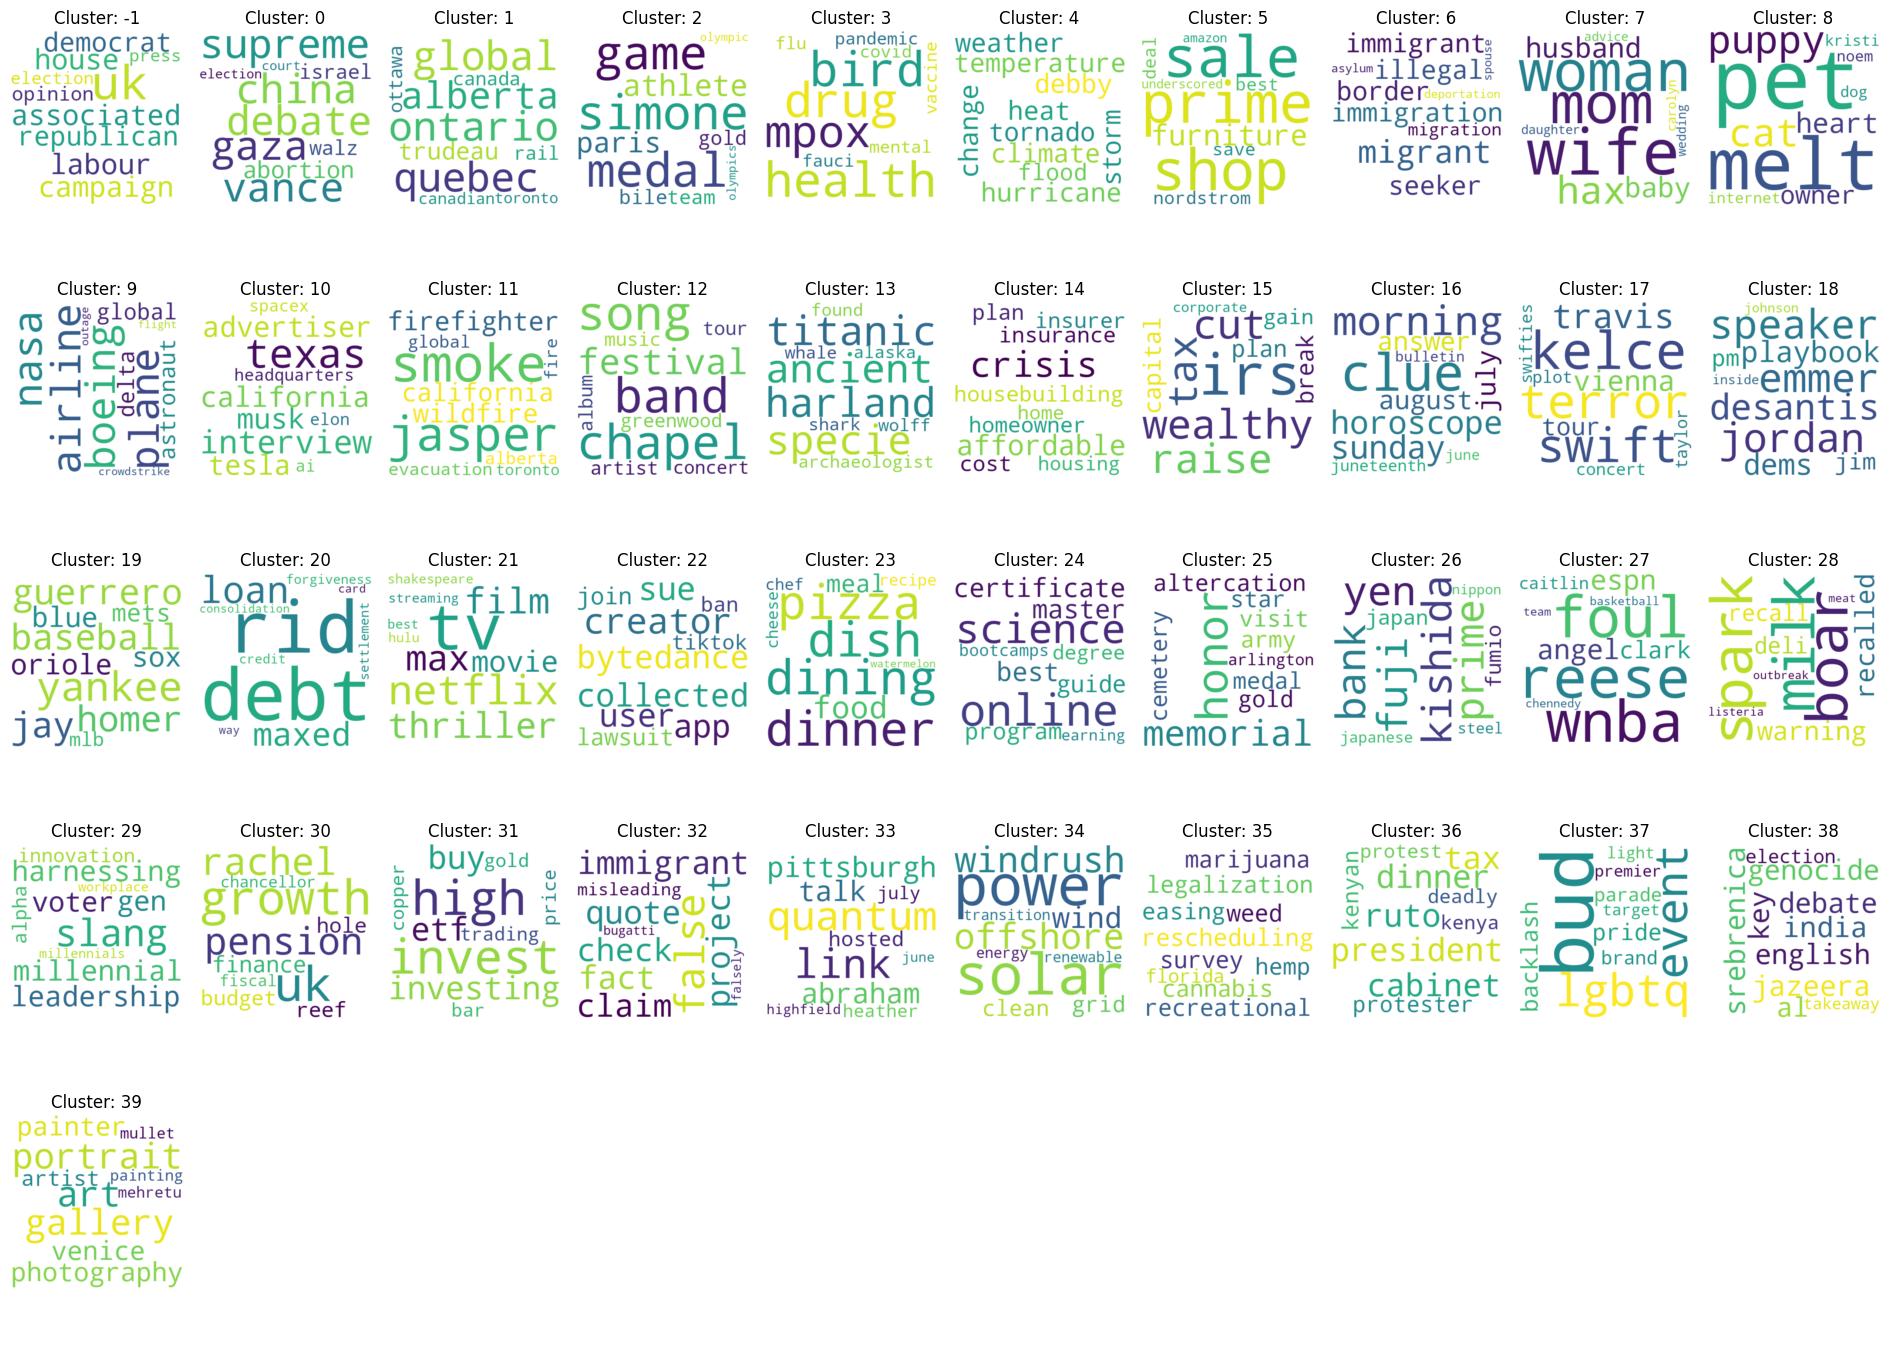

In [49]:
# Get top 20 words in each topic for visualization
# Extract the top 20 words for each topic
top_n = 20
top_words = {}

# Retrieve the topic-word mappings from the BERTopic model
topic_word_mappings = topic_model_i.get_topics()

for topic_id, topic_words in topic_word_mappings.items():
    # Get the top N words for each topic (sorted by importance)
    top_words[topic_id] = [word for word, _ in topic_words[:top_n]]

num_topics = len(top_words)
num_rows = math.ceil(num_topics / 10)  # 10 columns per row
num_cols = 10

# Create the subplots grid dynamically based on the number of topics
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(19, 14))
axes = axes.flatten()  # Flatten for easier indexing

num_clusters = len(top_words)
if num_clusters == 1:  # If only 1 cluster, make `axes` iterable
    axes = [axes]

for i, (cluster_label, words) in enumerate(top_words.items()):
    # Create word frequency dictionary
    word_freqs = {word: words.count(word) for word in set(words)}
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(word_freqs)
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(f"Cluster: {cluster_label}", fontsize=12)

# Remove unused axes 
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


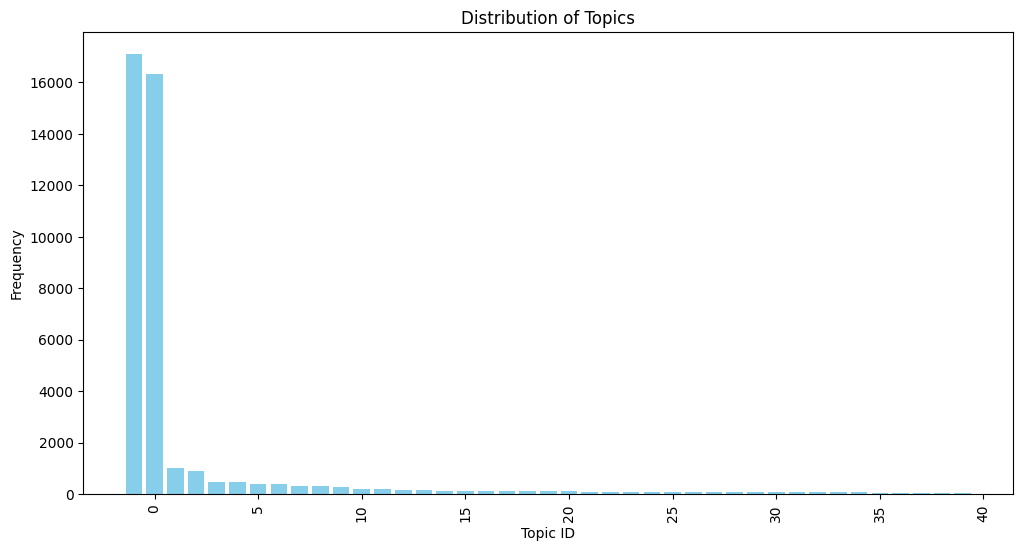

In [50]:
from collections import Counter

# Count the frequency of each topic
topic_counts = Counter(topics)

# Prepare data for the bar chart
topic_labels = list(topic_counts.keys())
topic_frequencies = list(topic_counts.values())

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(topic_labels, topic_frequencies, color='skyblue')
plt.xlabel('Topic ID')
plt.ylabel('Frequency')
plt.title('Distribution of Topics')
plt.xticks(rotation=90)
plt.show()

In [23]:
# load in pre-trained model
topic_model = BERTopic.load("bertopic_model_headline2")

df_topics = df.copy()
topics, probs = topic_model.transform(df_topics["headline_sentence"])
df_topics["topics"] = topics
df_topics["probabilities"] = probs.tolist()
df_topics.head()

# Ensure the number of columns matches the shape of `probs`
prob_df = pd.DataFrame(probs, columns=[f"topic_{i}" for i in range(probs.shape[1])])

# Combine article metadata with topic probabilities
df_corr = pd.concat([df_topics, prob_df], axis=1)
df_corr.head()

,outlet,headline,nlp_label,nlp-image_label,headline_words,headline_sentence,topics,probabilities,topic_0,topic_1,...,topic_30,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39
0,CBC.ca,"Tij Iginla embraces family name, eager to foll...",Likely to be Bias,Likely to be Unbiased,"['tij', 'iginla', 'embrace', 'family', 'name',...",tij iginla embrace family name eager follow ha...,-1,"[0.21626922170697535, 0.007158139937882683, 0....",0.216269,0.007158,...,5.530878e-43,3.698856e-47,3.629739e-42,4.597905e-49,6.252816e-43,0.007108,4.088506e-47,3.867220e-46,6.598126e-44,0.010233
1,CBC.ca,"The Sunday Magazine for June 23, 2024 - CBC.ca",Likely to be Bias,Likely to be Unbiased,"['sunday', 'magazine', 'june']",sunday magazine june,16,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2,CBC News,"Conservative MP shares inaccurate, ChatGPT-gen...",Likely to be Bias,Likely to be Bias,"['conservative', 'mp', 'share', 'inaccurate', ...",conservative mp share inaccurate stats capital...,15,"[0.2915789292235482, 0.003641347345152711, 0.0...",0.291579,0.003641,...,7.685705e-03,3.328083e-03,3.435366e-03,1.006627e-03,4.889677e-03,0.003320,2.847619e-03,2.910231e-03,3.119596e-03,0.003226
3,CBC.ca,"Women's sports are more popular than ever, but...",Likely to be Unbiased,Likely to be Unbiased,"['woman', 'sport', 'popular', 'ever', 'study',...",woman sport popular ever study female physiolo...,2,"[0.15004223334469047, 0.0022232382552446724, 0...",0.150042,0.002223,...,1.675714e-03,1.479875e-03,1.864874e-03,7.437536e-04,1.910168e-03,0.002213,1.497286e-03,1.978052e-03,1.648232e-03,0.003662
4,CBC.ca,June 22: Listener Question Show - CBC.ca,Likely to be Bias,Likely to be Unbiased,"['june', 'listener', 'question', 'show']",june listener question show,16,"[0.016265936083029443, 0.00021895676306753466,...",0.016266,0.000219,...,2.009199e-04,2.163424e-04,2.025977e-04,1.209180e-04,2.192021e-04,0.000222,1.832368e-04,2.409965e-04,1.911106e-04,0.000275


In [25]:
topic_columns = [col for col in df_corr.columns if col.startswith("topic_")]

# Calculate the mean topic probabilities per outlet
outlet_topic_matrix2 = df_corr.groupby('outlet')[topic_columns].mean().reset_index()

print("\nMean Topic Probabilities per Outlet:\n")
outlet_topic_matrix2.head()


Mean Topic Probabilities per Outlet:



,outlet,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_30,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39
0,ABC News,0.411447,0.002687,0.008330,0.017632,0.030138,0.003537,0.004825,0.007501,0.002284,...,0.001214,0.000915,0.001604,0.000908,0.002110,0.004848,0.002633,0.004179,0.001974,0.003139
1,Al Jazeera English,0.212051,0.000453,0.002817,0.000856,0.001767,0.000426,0.000460,0.000454,0.000348,...,0.000418,0.000343,0.000507,0.000148,0.001370,0.000406,0.016943,0.000429,0.609908,0.000496
2,Axios,0.463048,0.001733,0.001526,0.052233,0.004795,0.001864,0.001809,0.001884,0.000905,...,0.001868,0.001221,0.001913,0.000327,0.025928,0.001579,0.001078,0.001608,0.001594,0.002118
3,BBC.com,0.375479,0.002914,0.008918,0.010118,0.011616,0.002672,0.004209,0.002179,0.000987,...,0.001547,0.001418,0.003058,0.000339,0.002015,0.003703,0.012684,0.005387,0.007122,0.005786
4,Bloomberg,0.417024,0.003372,0.003672,0.026861,0.017517,0.006255,0.003870,0.002209,0.000885,...,0.001850,0.001104,0.001814,0.000361,0.003334,0.003182,0.002111,0.005203,0.007149,0.002470


In [51]:
# Get the reduced-dimensional embeddings from the BERTopic model
embeddings = topic_model.transform(df['headline_sentence'])[1]

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(embeddings, topics)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: -0.47839375895085123
